<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


**1. check wether data is clean**
missing duplicates outliers
**2. estimate what would be the price of the house given set of independent variables**
**3. Identify the key independent variables that help in etimasting the house price **
**4. discuss about the accuracy of prediction**


In [ ]:
data=pd.read_excel('/content/Housing data.xlsx')

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,2.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [ ]:
# prompt: check for missing values

data.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# prompt: check for duplicate values

duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
  print("No duplicates found.")
else:
  print("Duplicates found:")
  duplicate_rows
#To remove duplicate rows use:
#data.drop_duplicates(inplace=True)
#data


No duplicates found.


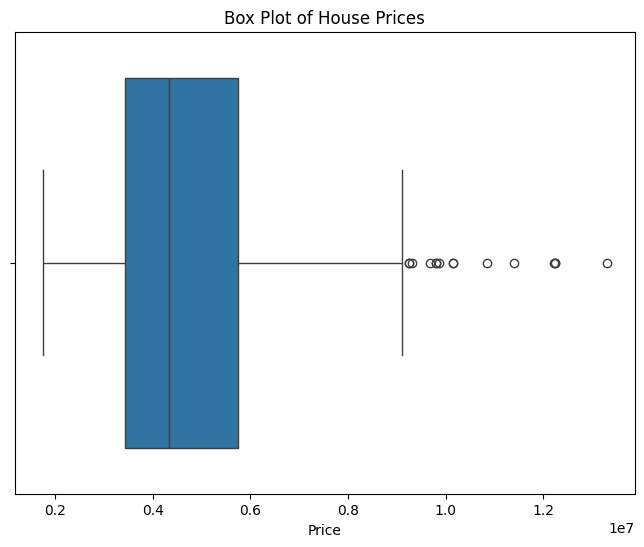

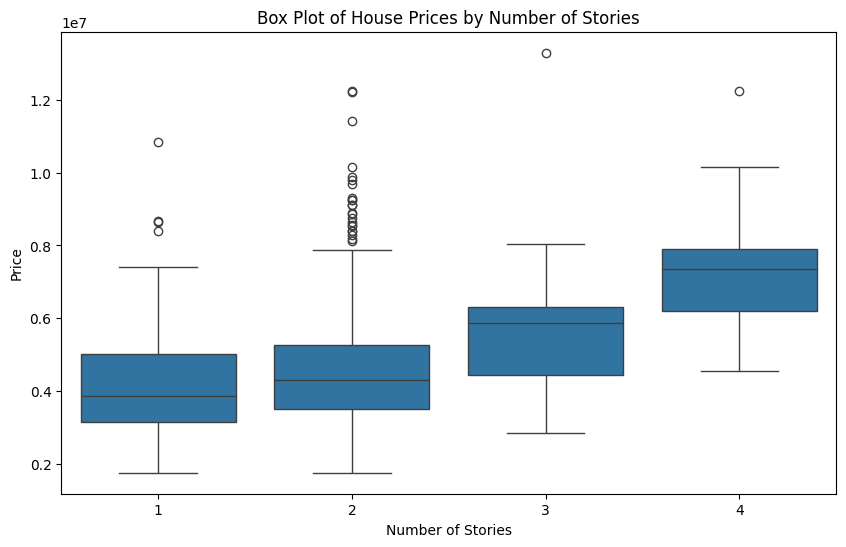

In [ ]:
# prompt: generate box plot for data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code.

# Example: Box plot of 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=data)
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

# Example: Box plot of 'price' grouped by 'stories' (replace 'stories' with another relevant categorical column)
plt.figure(figsize=(10, 6))
sns.boxplot(x='stories', y='price', data=data)
plt.title('Box Plot of House Prices by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.show()


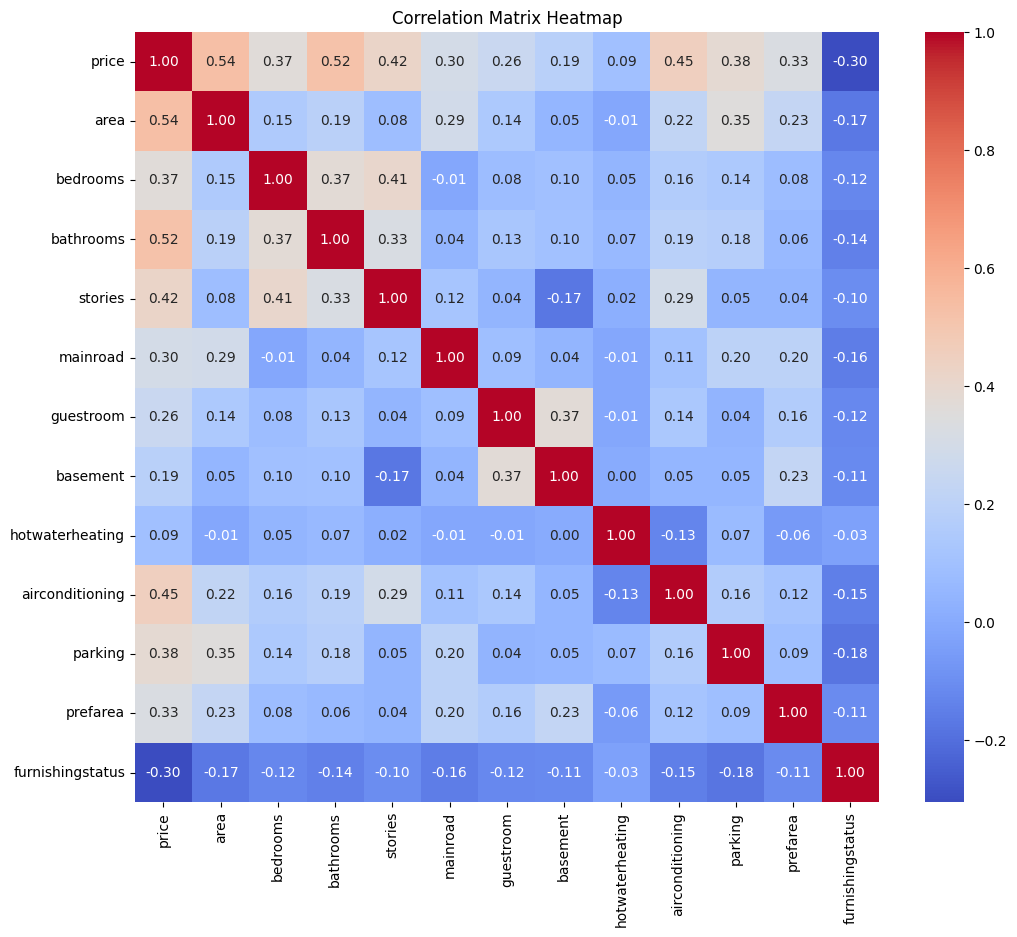

In [ ]:
# prompt: heat map for data

# Assuming 'data' DataFrame is already loaded.

# Example: Heatmap of correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# prompt: multiple linear regression on data with dependent variable y be price

import statsmodels.api as sm

# Define the dependent and independent variables
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Replace with your actual independent variables
y = data['price']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions
predictions = model.predict(X)

# Evaluate the model (example: R-squared)
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

# You can further analyze the coefficients, p-values, and other statistics
# from the model summary to understand the relationship between the
# independent and dependent variables.  You can also use other metrics like
# Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) to evaluate
# the model's performance.  For example:

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y, predictions))
print(f"Root Mean Squared Error: {rmse}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           4.37e-94
Time:                        04:49:48   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5